In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def configurations(size=20):
    return np.random.choice([-1, 1], size)

In [3]:
def energy_ising(configuration, J, h):
    num_spins = len(configuration)
    energy = 0.0
    for i in range(num_spins):
        spini = configuration[i]
        ip1 = (i+1)%num_spins
        spinip1 = configuration[ip1]
        
        energy = energy - J * (spini * spinip1) - h*spini
        
    return energy

In [4]:
def energy_difference(J, h, s, sleft, sright):
    return 2*h*s + 2*J*s*(sleft + sright)

In [22]:
def monte_carlo(n_steps, size, beta, J, h):
    configuration = configurations(size)
    average_spins = []
    current_energy = energy_ising(configuration, J, h)

    for i in range(n_steps):
        spin_to_change = np.random.randint(size)        
        s = configuration[spin_to_change]
        sright = configuration[(spin_to_change + 1)%size]
        sleft = configuration[(spin_to_change - 1)%size]
        dE = energy_difference(J, h, s, sleft, sright)
        
        r = np.random.random()
        if r < np.exp(-beta*dE):
            configuration[spin_to_change] *= -1
            current_energy += dE
        else:
            pass

        average_spins.append(configuration.mean())

    return current_energy, average_spins       


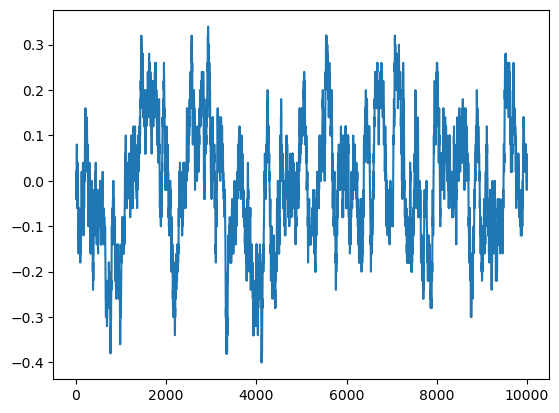

In [25]:
plt.plot(monte_carlo(10000, 100, 0.2, 1, 0)[1])